# 1. Libraries & Sample Data
The first step is to load our Python Libraries and download the sample data. The dataset represents Apple stock price (1d bars) for the year 2010

In [43]:
# Load Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'

In [44]:
# Download Sample Data AAPL_2009-2010_6m_features_1d.csv
data = pd.read_csv('../datasets/AAPL_2009-2010_6m_features_1d.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,STD20,BB_upper,BB_lower,Log_Ret,Vol20
0,2009-04-30,4.507857,4.535714,4.461429,4.493929,3.799404,498489600.0,4.453572,4.312857,0.128631,4.570118,4.055596,0.005499,0.287544
1,2009-05-01,4.492857,4.569643,4.492857,4.544286,3.841980,397516000.0,4.477429,4.338804,0.119607,4.578017,4.099590,0.011143,0.267026
2,2009-05-04,4.580000,4.723214,4.560000,4.716786,3.987818,609358400.0,4.529857,4.367518,0.137583,4.642685,4.092351,0.037257,0.278159
3,2009-05-05,4.580000,4.723214,4.560000,4.716786,3.987818,609358400.0,4.588214,4.391839,0.154067,4.699974,4.083704,0.000000,0.273591
4,2009-05-06,4.761786,4.767857,4.650714,4.732143,4.000803,473538800.0,4.640786,4.416929,0.166724,4.750376,4.083481,0.003251,0.272976


# 5. State Space Representation
Now we have a set of data with OHLC data plus some techinchal indicators. Using this data, construct the state space matrix, whese features of the state space are Close Price, 5-day Moving Average, 20-day Moving Average, Bollinger Bands (upper and lower), and 20-day Historical Volatility of Close Price.

In [46]:
# Construct the State Space Matrix
dataset = data[['Date', 'Close', 'MA5', 'MA20', 'BB_upper', 'BB_lower', 'Vol20']]
dataset.head()

,Date,Close,MA5,MA20,BB_upper,BB_lower,Vol20
0,2009-04-30,4.493929,4.453572,4.312857,4.570118,4.055596,0.287544
1,2009-05-01,4.544286,4.477429,4.338804,4.578017,4.099590,0.267026
2,2009-05-04,4.716786,4.529857,4.367518,4.642685,4.092351,0.278159
3,2009-05-05,4.716786,4.588214,4.391839,4.699974,4.083704,0.273591
4,2009-05-06,4.732143,4.640786,4.416929,4.750376,4.083481,0.272976


# 6. Z-Score Normalization
Now that we have cleaned our data, and created our features of interest, we must normalize our data. For this example, we use the sklearn StandardScaler, which centers the data and normalizes to unit variance (i.e. performs z-score normalization for us). Do this in a simple, non-rolling fashion.

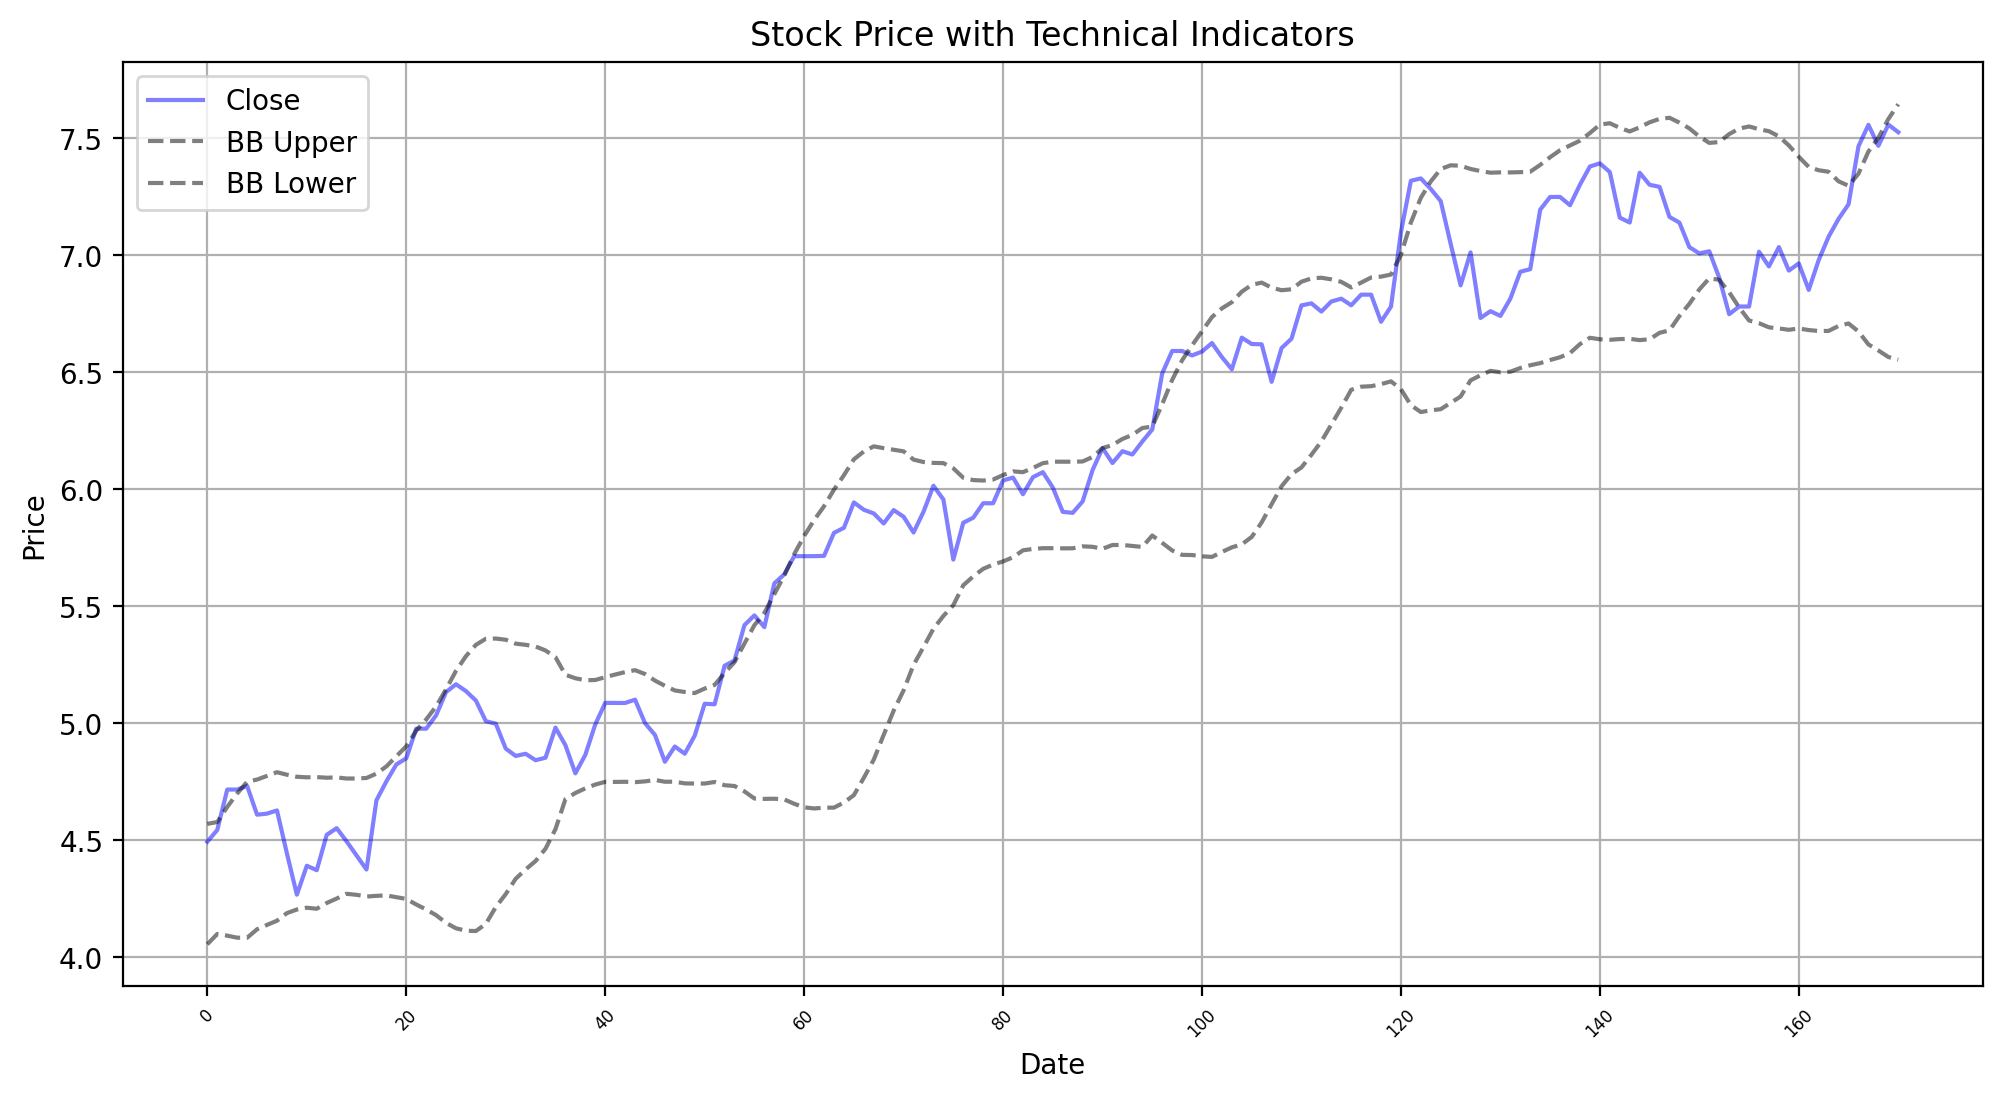

In [47]:
# Plot Un-normalized Close Price and Bollinger Bands
# Plot Features on One Chart: Close, MA20, BB Upper, BB Lower
plt.figure(figsize=(12,6))
plt.plot(dataset.index, dataset['Close'], label='Close', color='blue', alpha=0.5)
plt.plot(dataset.index, dataset['BB_upper'], label='BB Upper', color='black', alpha=0.5, linestyle='--')
plt.plot(dataset.index, dataset['BB_lower'], label='BB Lower', color='black', alpha=0.5, linestyle='--')
plt.title('Stock Price with Technical Indicators')
plt.xlabel('Date') 
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Reduce x-axis tick density by showing fewer ticks
plt.xticks(data.index[::20], rotation=45, fontsize=6)  # Show every 20th tick
plt.show()


In [48]:
# Normalize Dataset with StandardScaler
static_normed_dataset = pd.DataFrame(index=dataset.index, columns=dataset.columns)
for col in dataset.columns:
    if col == 'Date':
        static_normed_dataset[col] = dataset[col]
        continue
    normalizer = StandardScaler()
    column_data = dataset[col].values
    # fit normalizer, transform data column with fitted normalizer, put transformed column in normed dataframe
    normalizer.fit(column_data.reshape(-1, 1))
    column_data = normalizer.transform(column_data.reshape(-1, 1))
    static_normed_dataset[col] = column_data.reshape(-1)

static_normed_dataset['Date'] = dataset['Date']
static_normed_dataset.set_index('Date', inplace=True)
static_normed_dataset.head()


,Close,MA5,MA20,BB_upper,BB_lower,Vol20
Date,,,,,,
2009-04-30,-1.608746,-1.619760,-1.623591,-1.687748,-1.526756,0.381032
2009-05-01,-1.556090,-1.594713,-1.596585,-1.679774,-1.480366,-0.002786
2009-05-04,-1.375714,-1.539671,-1.566697,-1.614489,-1.488000,0.205470
2009-05-05,-1.375714,-1.478405,-1.541382,-1.556652,-1.497117,0.120027
2009-05-06,-1.359656,-1.423213,-1.515267,-1.505769,-1.497353,0.108523


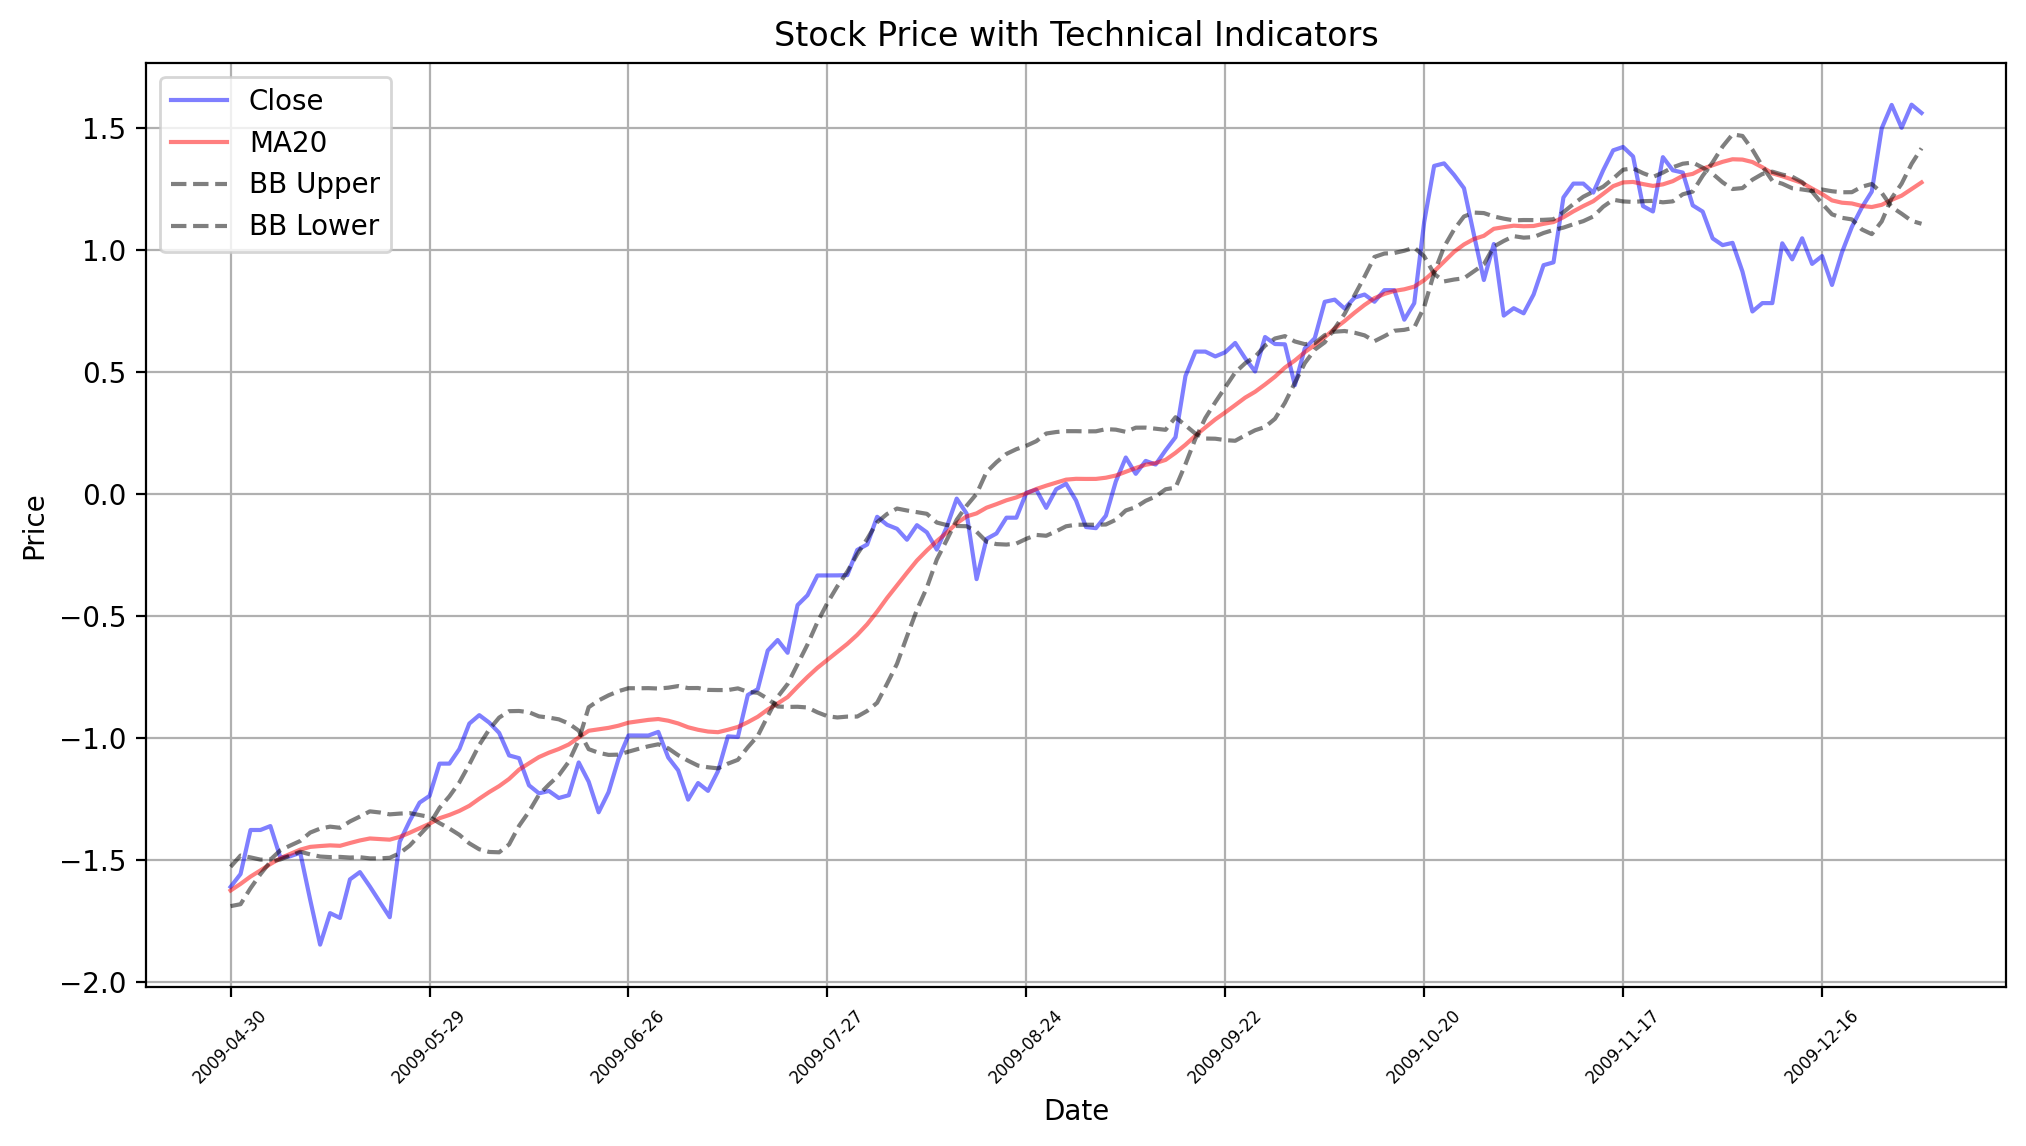

In [49]:
# Plot Normalized Features: Close, MA20, BB Upper, BB Lower
plt.figure(figsize=(12,6))
plt.plot(static_normed_dataset.index, static_normed_dataset['Close'], label='Close', color='blue', alpha=0.5)
plt.plot(static_normed_dataset.index, static_normed_dataset['MA20'], label='MA20', color='red', alpha=0.5)
plt.plot(static_normed_dataset.index, static_normed_dataset['BB_upper'], label='BB Upper', color='black', alpha=0.5, linestyle='--')
plt.plot(static_normed_dataset.index, static_normed_dataset['BB_lower'], label='BB Lower', color='black', alpha=0.5, linestyle='--')
plt.title('Stock Price with Technical Indicators')
plt.xlabel('Date') 
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Reduce x-axis tick density by showing fewer ticks
plt.xticks(static_normed_dataset.index[::20], rotation=45, fontsize=6)  # Show every 20th tick
plt.show()


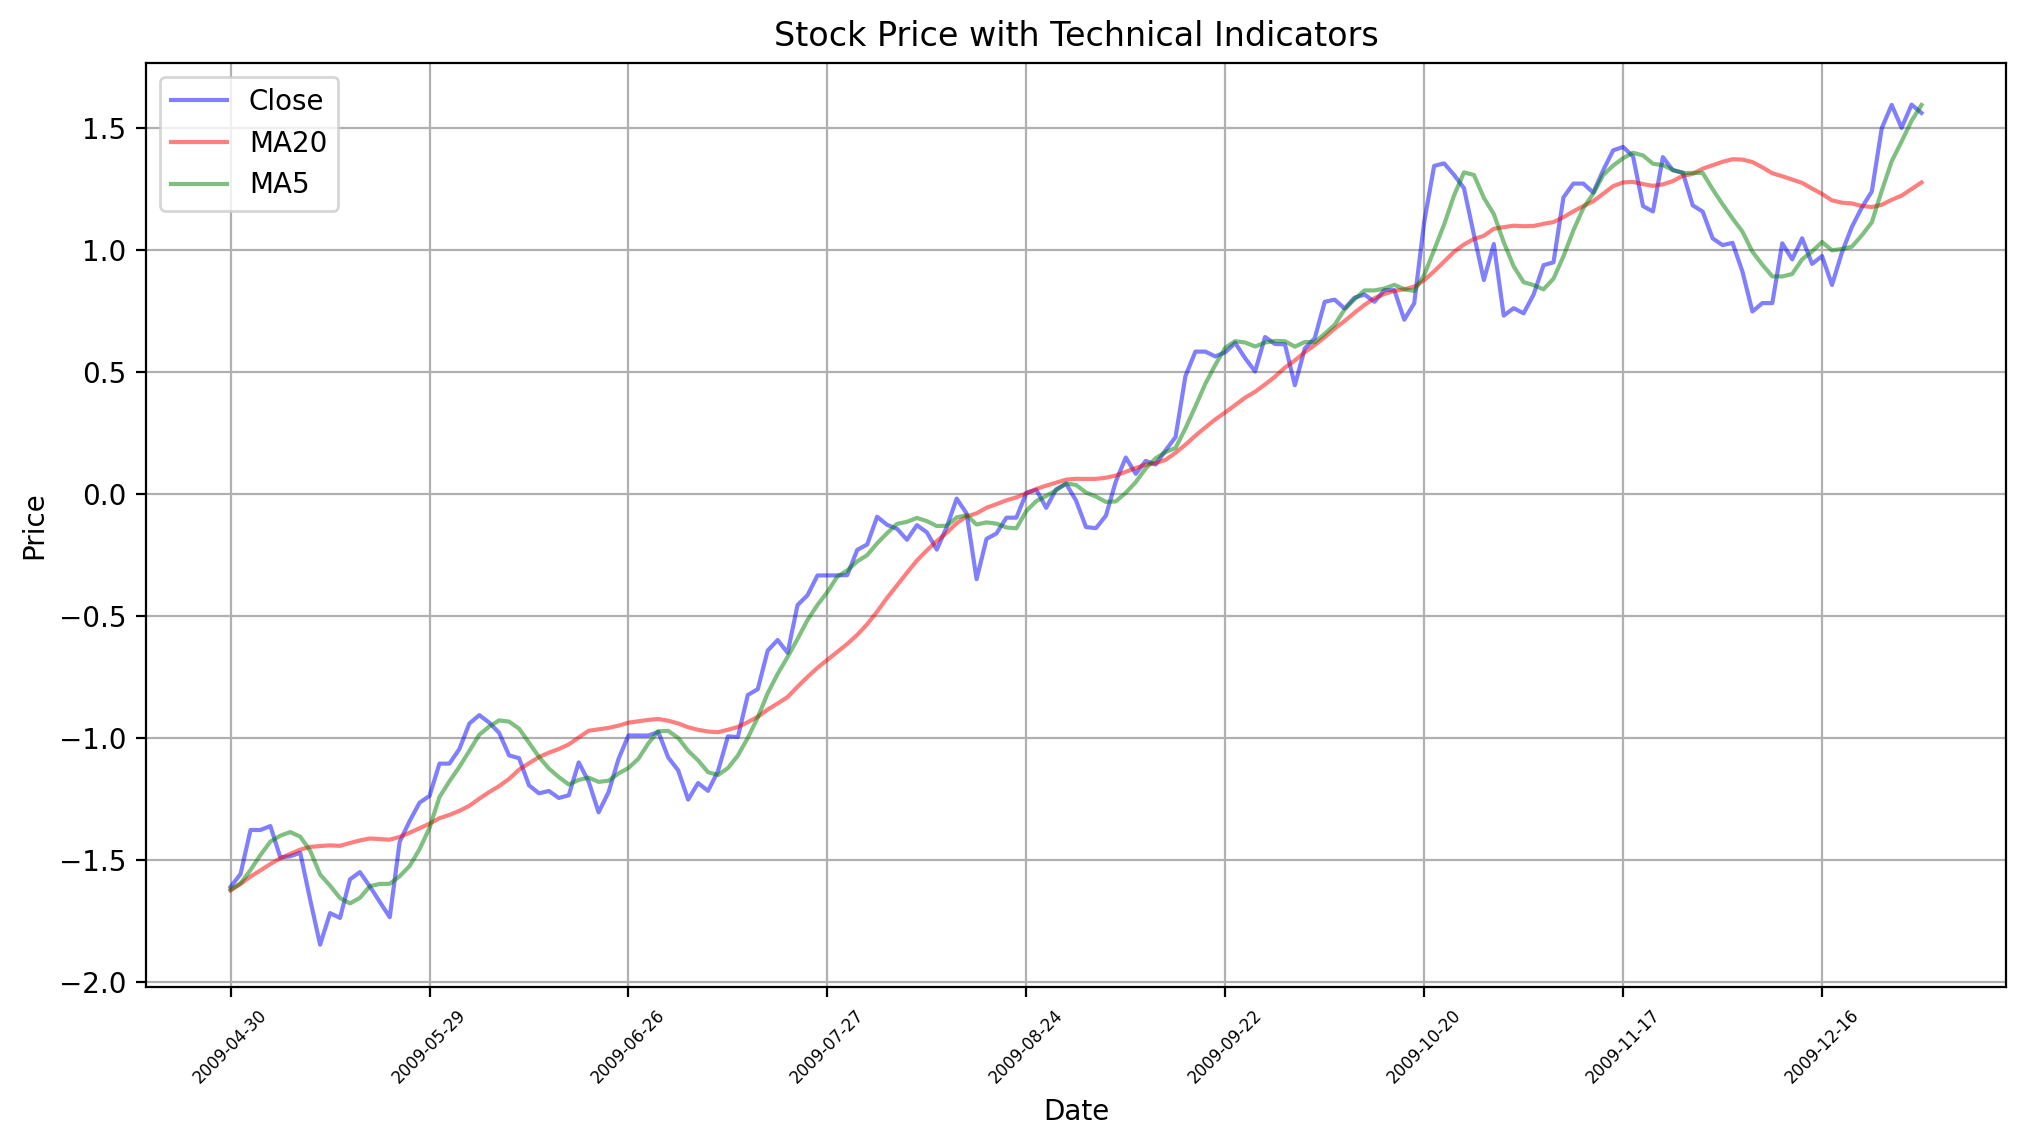

In [50]:
# Plot Normalized Features: Close, MA20, MA5
plt.figure(figsize=(12,6))
plt.plot(static_normed_dataset.index, static_normed_dataset['Close'], label='Close', color='blue', alpha=0.5)
plt.plot(static_normed_dataset.index, static_normed_dataset['MA20'], label='MA20', color='red', alpha=0.5)
plt.plot(static_normed_dataset.index, static_normed_dataset['MA5'], label='MA5', color='green', alpha=0.5)
plt.title('Stock Price with Technical Indicators')
plt.xlabel('Date') 
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Reduce x-axis tick density by showing fewer ticks
plt.xticks(static_normed_dataset.index[::20], rotation=45, fontsize=6)  # Show every 20th tick
plt.show()


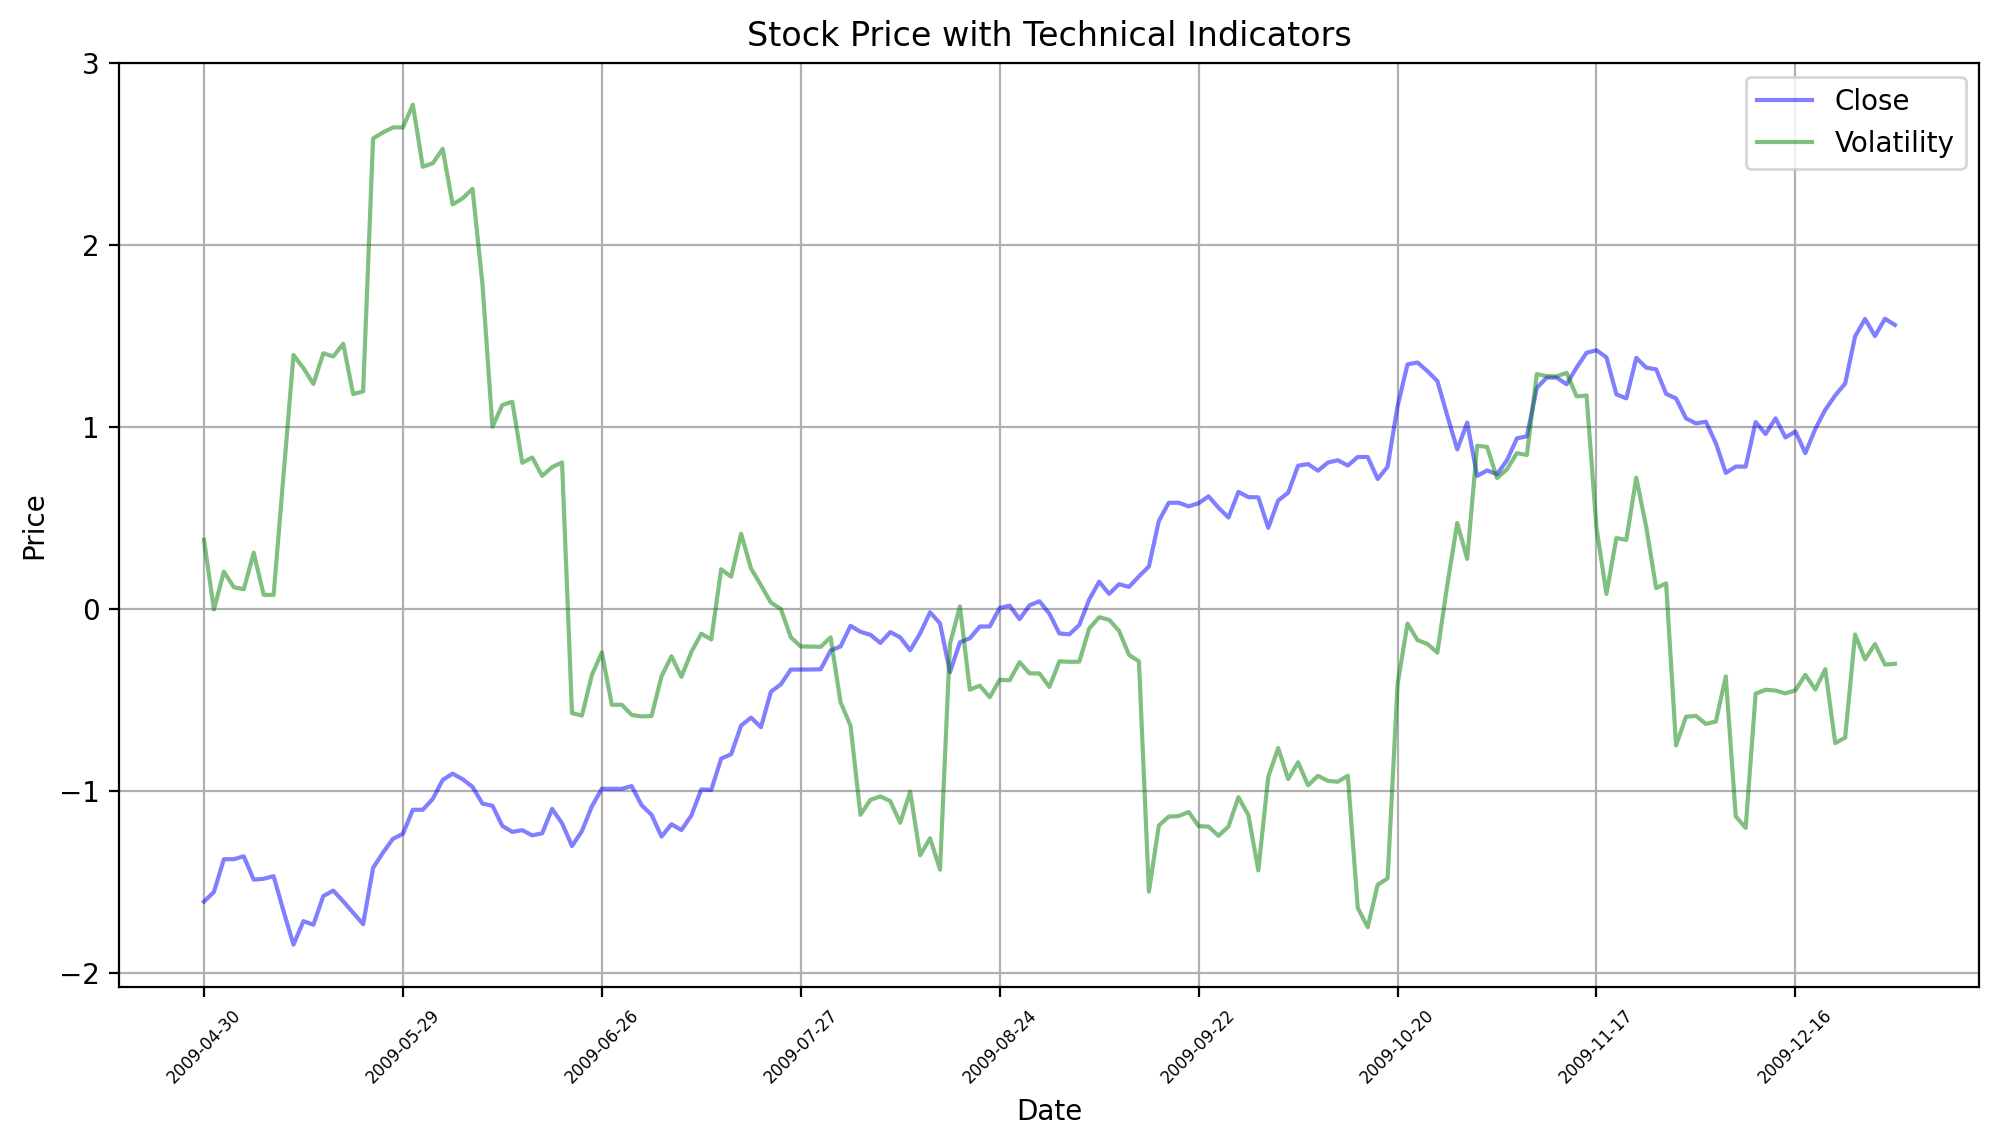

In [51]:
# Plot Normalized Features: Close, Volatility
plt.figure(figsize=(12,6))
plt.plot(static_normed_dataset.index, static_normed_dataset['Close'], label='Close', color='blue', alpha=0.5)
plt.plot(static_normed_dataset.index, static_normed_dataset['Vol20'], label='Volatility', color='green', alpha=0.5)
plt.title('Stock Price with Technical Indicators')
plt.xlabel('Date') 
plt.ylabel('Price')
plt.legend()
plt.grid(True)
# Reduce x-axis tick density by showing fewer ticks
plt.xticks(static_normed_dataset.index[::20], rotation=45, fontsize=6)  # Show every 20th tick
plt.show()

# 7. Rolling Z-Score Normalization
Now that we have cleaned our data, and created our features of interest, we must normalize our data. For this example, we use the sklearn StandardScaler, which centers the data and normalizes to unit variance. Due to the fact that our data is time-series data, it is best practice to do this in a rolling fashion. We choose 20 days as our window for normalization, and run the StandardScaler in a rolling (non-overlapping) fashion. 

In [53]:
# Display raw dataset (unnormalized) 
dataset.head()

,Date,Close,MA5,MA20,BB_upper,BB_lower,Vol20
0,2009-04-30,4.493929,4.453572,4.312857,4.570118,4.055596,0.287544
1,2009-05-01,4.544286,4.477429,4.338804,4.578017,4.099590,0.267026
2,2009-05-04,4.716786,4.529857,4.367518,4.642685,4.092351,0.278159
3,2009-05-05,4.716786,4.588214,4.391839,4.699974,4.083704,0.273591
4,2009-05-06,4.732143,4.640786,4.416929,4.750376,4.083481,0.272976


In [54]:
# Normalize the chosen price data & features
normed_dataset = pd.DataFrame(index=dataset.index, columns=dataset.columns)
step = 20
for col in dataset.columns:
    n = 0
    if col == 'Date':
        normed_dataset[col] = dataset[col]
        continue
    while n<=len(data.index):
        normalizer = StandardScaler()
        if n == 0:
            # fit normalizer, transform data column with fitted normalizer, put transformed column in normed dataframe
            column_data = normalizer.fit_transform(dataset.loc[:step, col].values.reshape(-1, 1))
            normed_dataset.loc[:step, col] = column_data.reshape(-1)
        elif n+step >= len(data.index):
            # fit normalizer, transform data column with fitted normalizer, put transformed column in normed dataframe
            column_data = normalizer.fit_transform(dataset.loc[n:, col].values.reshape(-1, 1))
            normed_dataset.loc[n:, col] = column_data.reshape(-1)
        else:
            # fit normalizer, transform data column with fitted normalizer, put transformed column in normed dataframe
            column_data = normalizer.fit_transform(dataset.loc[n:n+step, col].values.reshape(-1, 1))
            normed_dataset.loc[n:n+step, col] = column_data.reshape(-1)
        n += step

normed_dataset['Date'] = dataset['Date']
normed_dataset.set_index('Date', inplace=True)
normed_dataset.head()


,Close,MA5,MA20,BB_upper,BB_lower,Vol20
Date,,,,,,
2009-04-30,-0.498277,-0.923737,-2.311213,-2.424338,-1.836809,-0.796838
2009-05-01,-0.175715,-0.662103,-1.933253,-2.320603,-1.227992,-1.222017
2009-05-04,0.929236,-0.087135,-1.514973,-1.471287,-1.328172,-0.991319
2009-05-05,0.929236,0.55285,-1.160685,-0.718872,-1.44783,-1.08597
2009-05-06,1.027606,1.129385,-0.795211,-0.056918,-1.450921,-1.098713


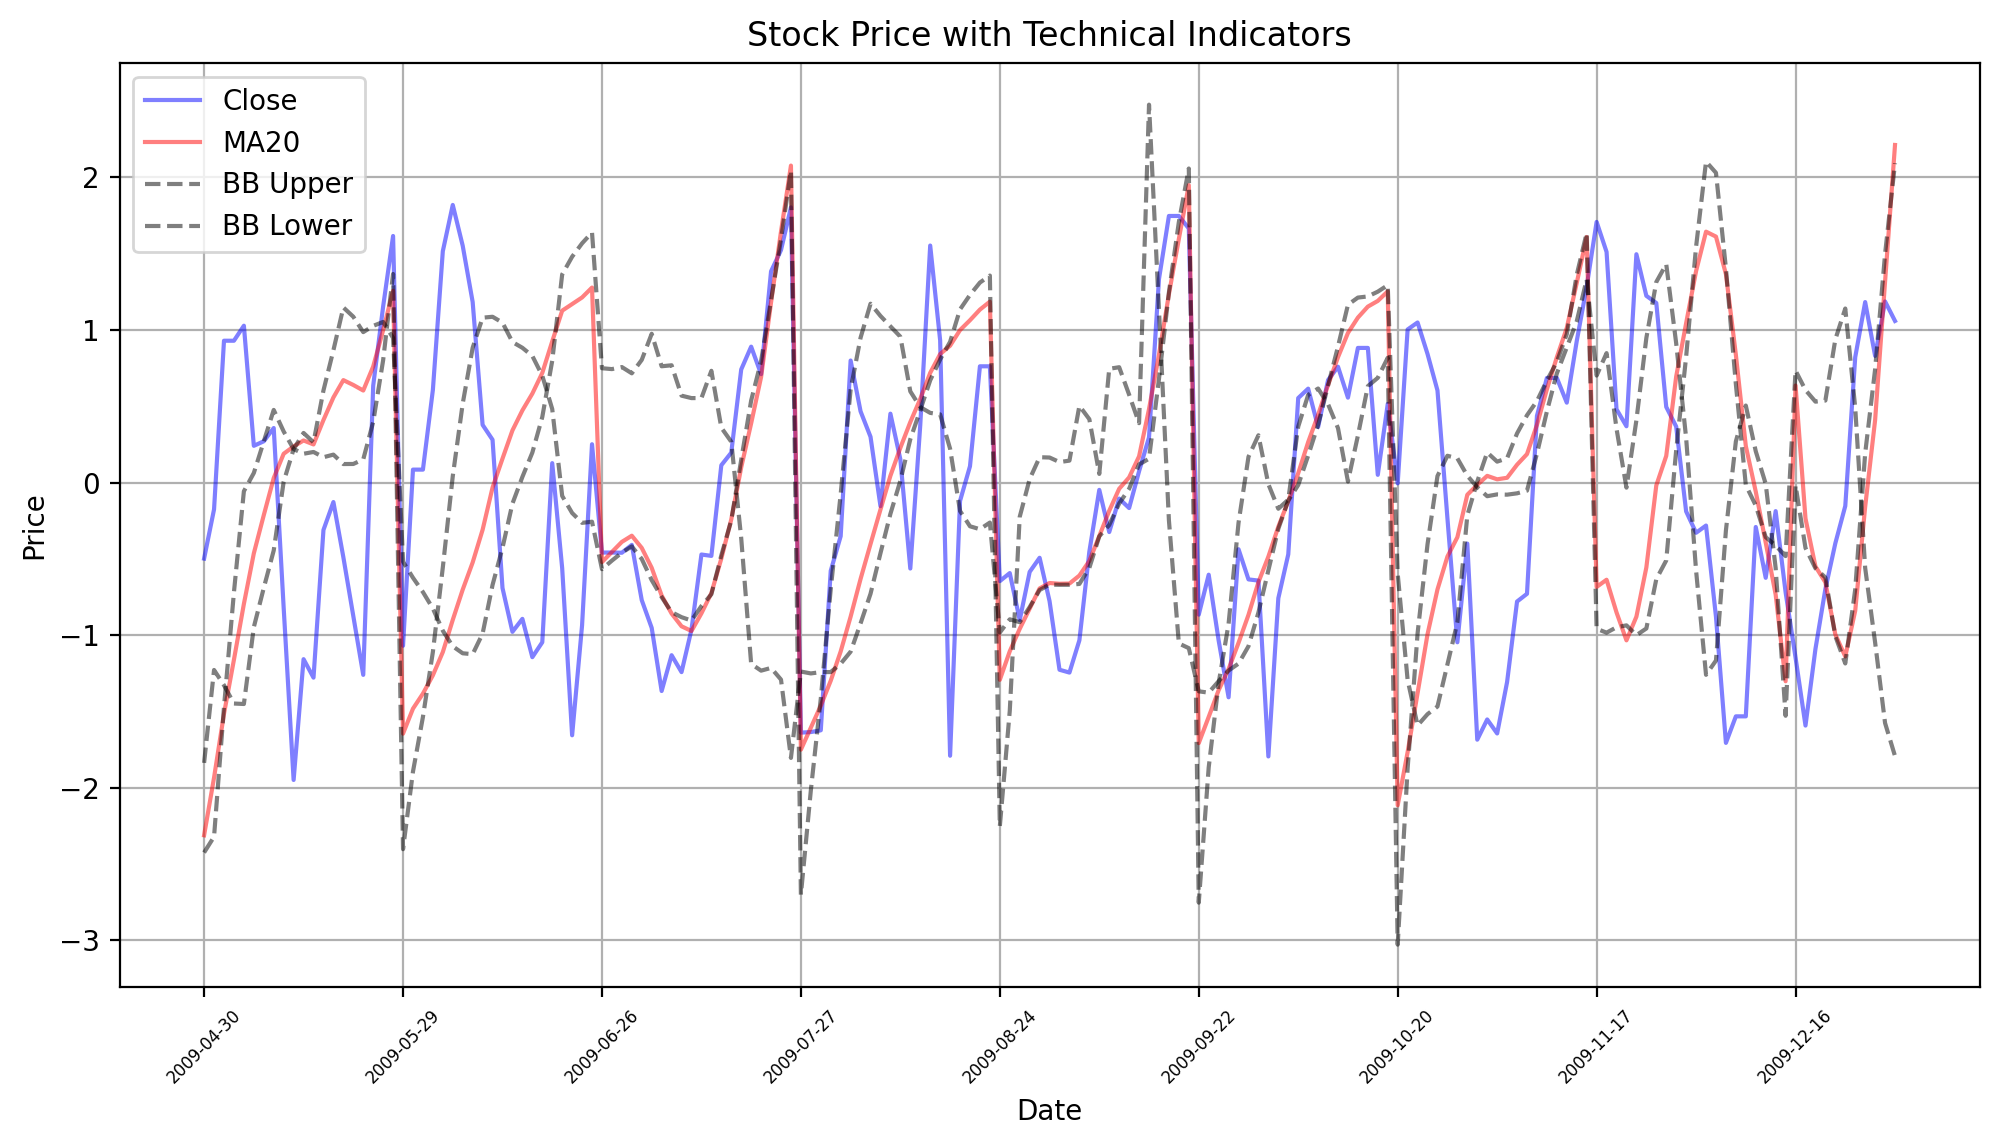

In [56]:
# Plot Normalized Features: Close, MA20, BB Upper, BB Lower
plt.figure(figsize=(12,6))
plt.plot(normed_dataset.index, normed_dataset['Close'], label='Close', color='blue', alpha=0.5)
plt.plot(normed_dataset.index, normed_dataset['MA20'], label='MA20', color='red', alpha=0.5)
plt.plot(normed_dataset.index, normed_dataset['BB_upper'], label='BB Upper', color='black', alpha=0.5, linestyle='--')
plt.plot(normed_dataset.index, normed_dataset['BB_lower'], label='BB Lower', color='black', alpha=0.5, linestyle='--')
plt.title('Stock Price with Technical Indicators')
plt.xlabel('Date') 
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Reduce x-axis tick density by showing fewer ticks
plt.xticks(normed_dataset.index[::20], rotation=45, fontsize=6)  # Show every 20th tick
plt.show()


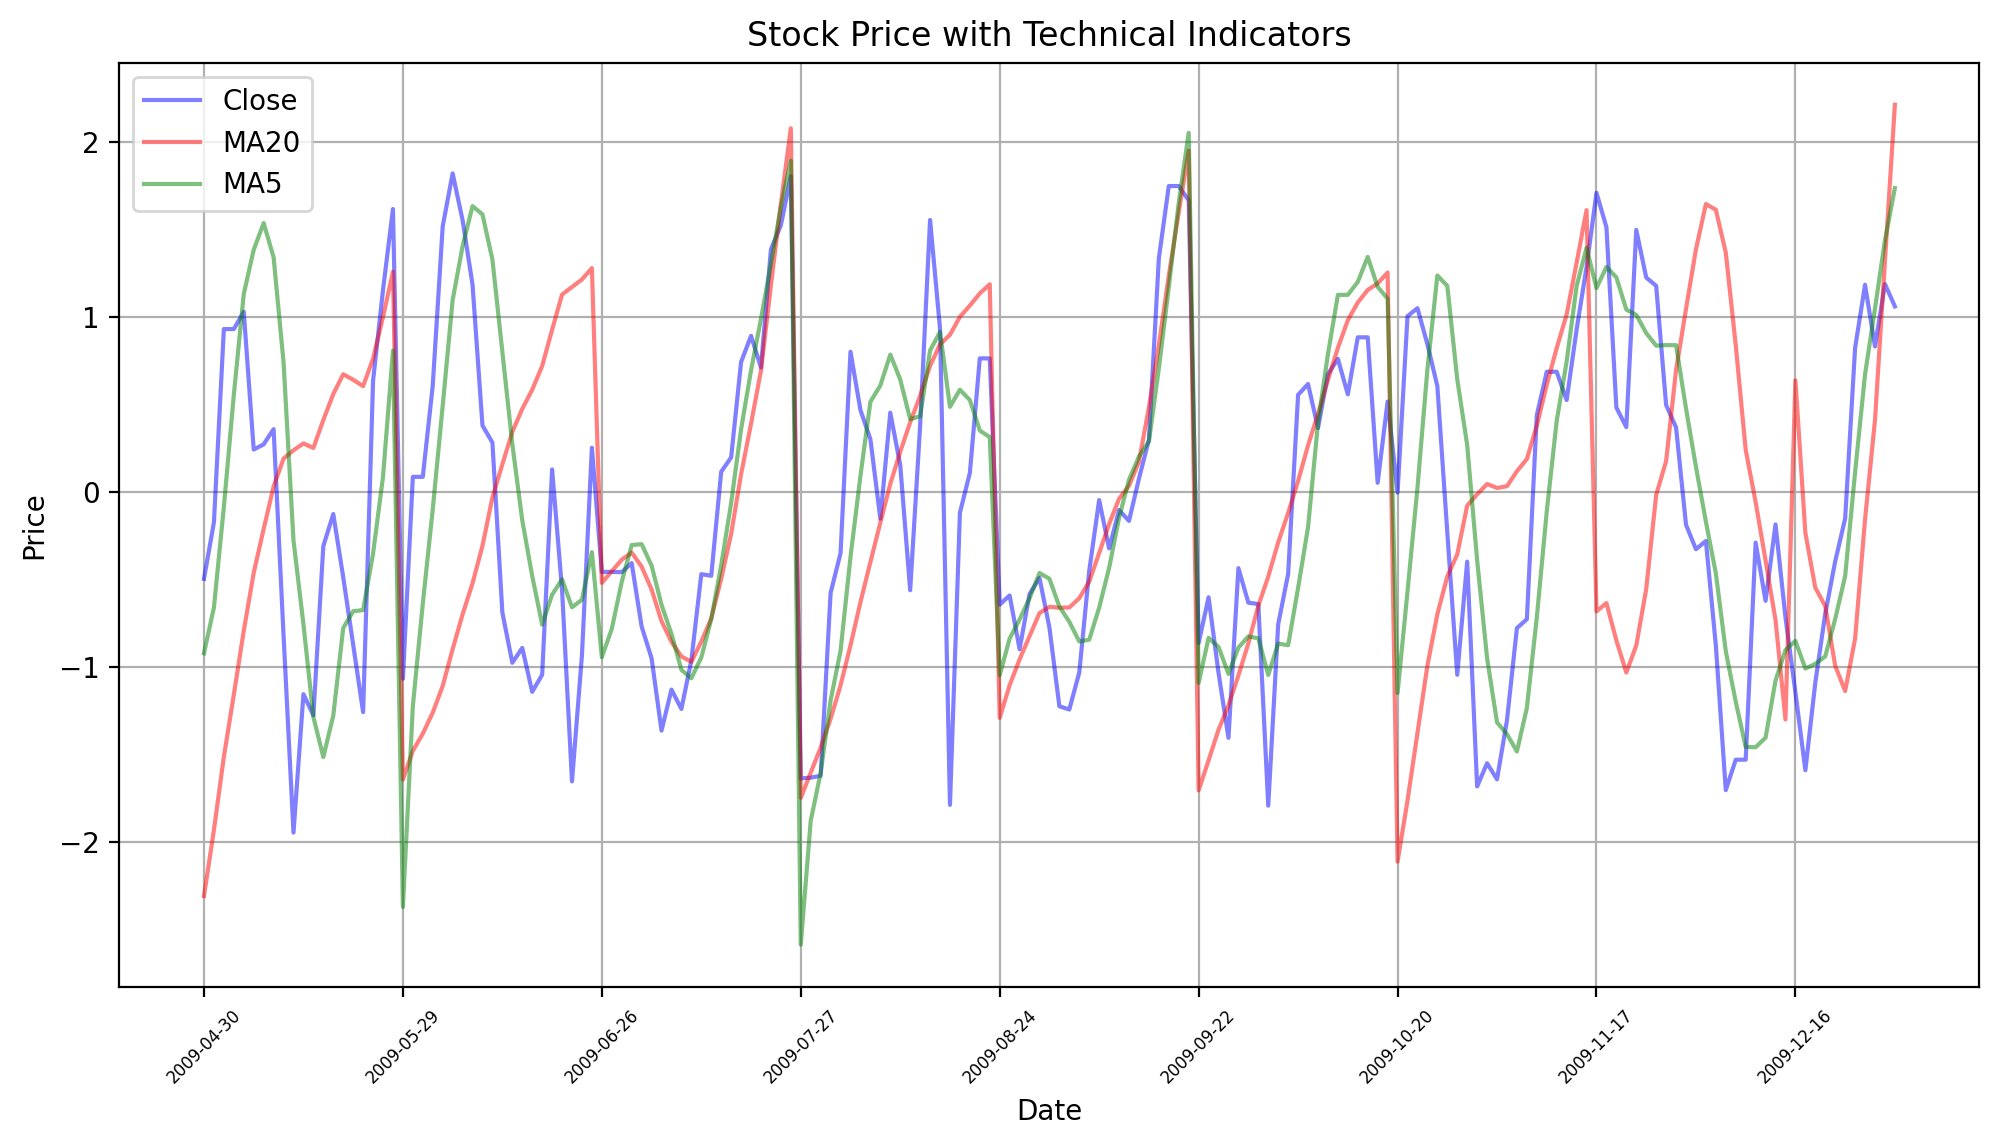

In [57]:
# Plot Normalized Features: Close, MA20, MA5
plt.figure(figsize=(12,6))
plt.plot(normed_dataset.index, normed_dataset['Close'], label='Close', color='blue', alpha=0.5)
plt.plot(normed_dataset.index, normed_dataset['MA20'], label='MA20', color='red', alpha=0.5)
plt.plot(normed_dataset.index, normed_dataset['MA5'], label='MA5', color='green', alpha=0.5)
plt.title('Stock Price with Technical Indicators')
plt.xlabel('Date') 
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Reduce x-axis tick density by showing fewer ticks
plt.xticks(normed_dataset.index[::20], rotation=45, fontsize=6)  # Show every 20th tick
plt.show()


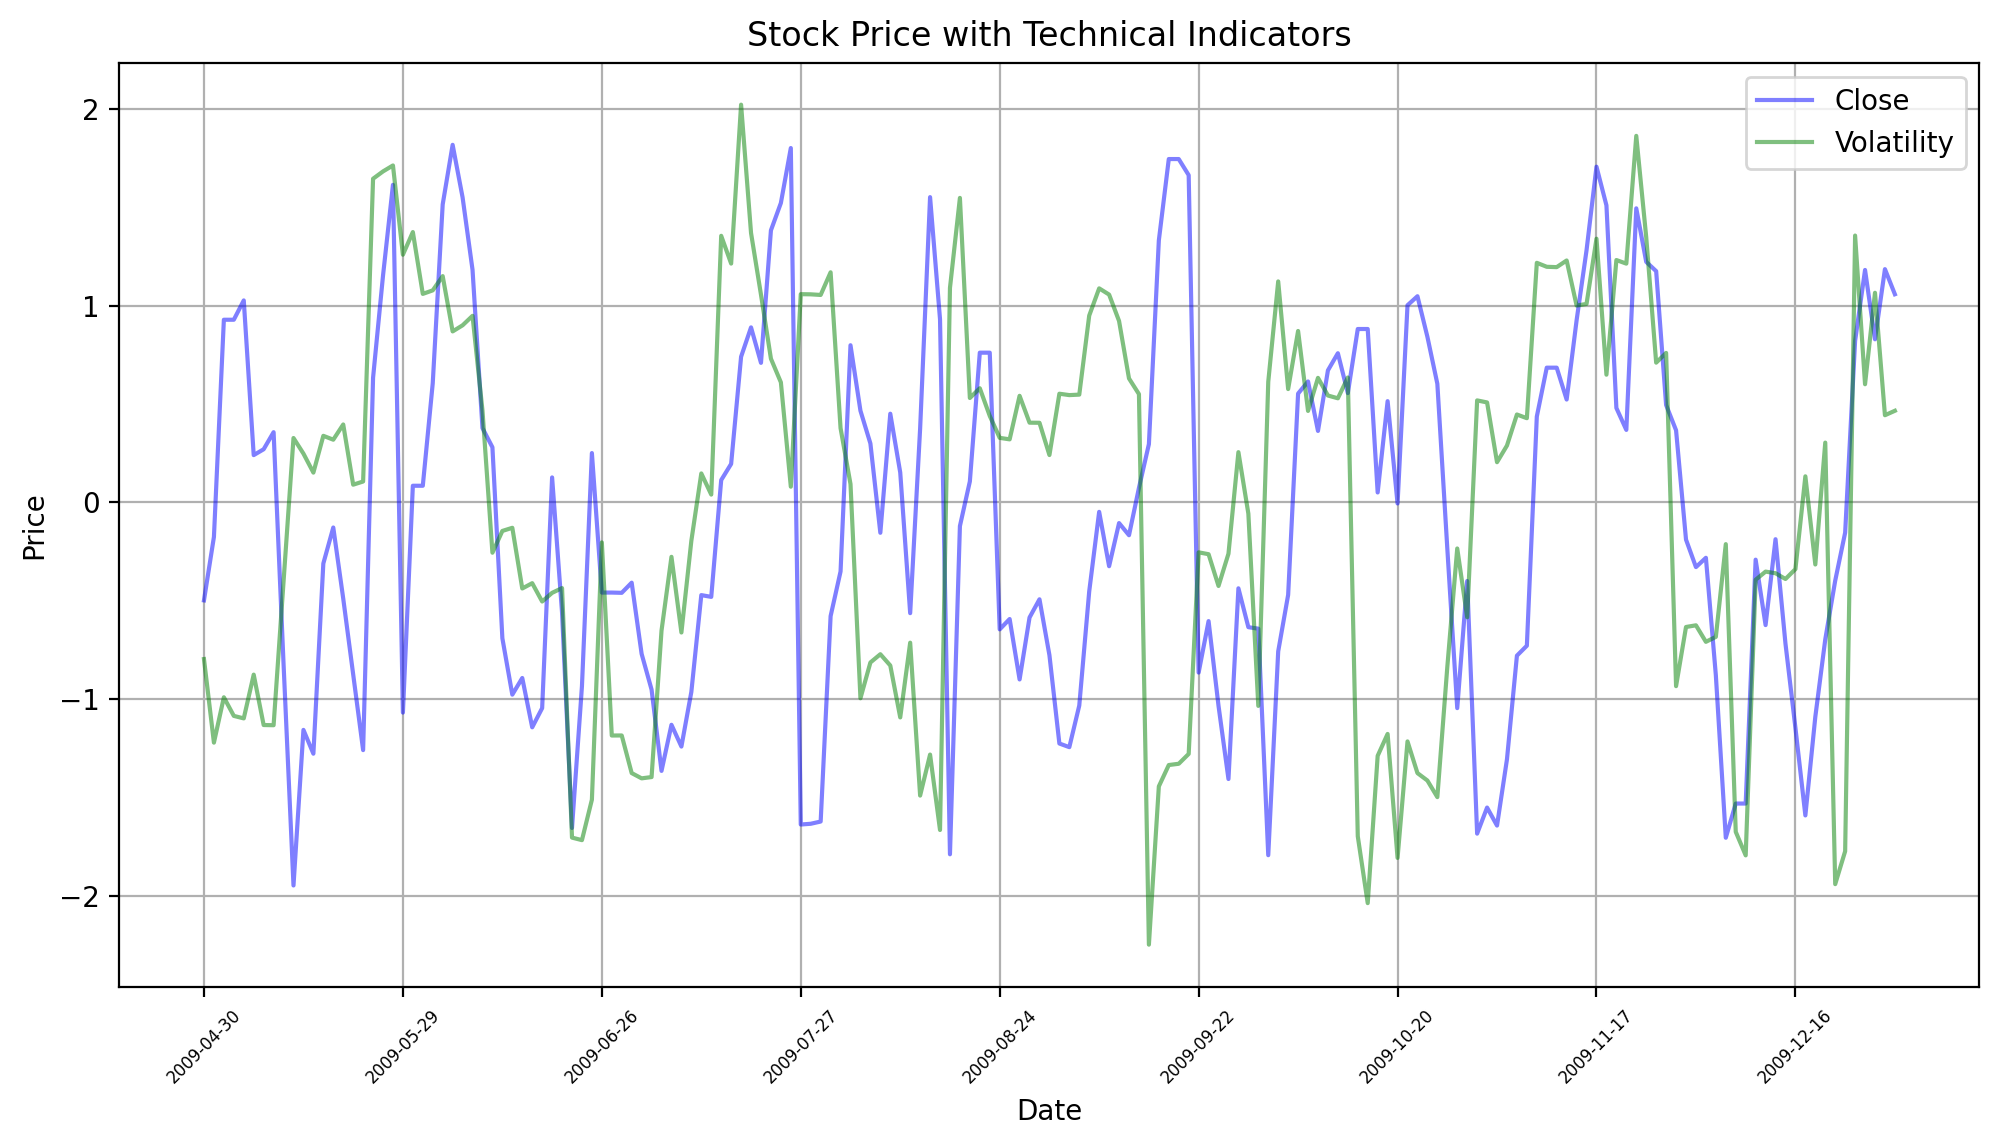

In [58]:
# Plot Normalized Features: Close, Volatility
plt.figure(figsize=(12,6))
plt.plot(normed_dataset.index, normed_dataset['Close'], label='Close', color='blue', alpha=0.5)
plt.plot(normed_dataset.index, normed_dataset['Vol20'], label='Volatility', color='green', alpha=0.5)
plt.title('Stock Price with Technical Indicators')
plt.xlabel('Date') 
plt.ylabel('Price')
plt.legend()
plt.grid(True)
# Reduce x-axis tick density by showing fewer ticks
plt.xticks(normed_dataset.index[::20], rotation=45, fontsize=6)  # Show every 20th tick
plt.show()

In [59]:
normed_dataset.to_csv('../datasets/AAPL_2009-2010_6m_normed_1d.csv')